### project 2 

In [22]:
from sklearn.datasets import load_digits
digits = load_digits()

In [23]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [24]:
digits.target.shape

(1797,)

In [25]:
digits.data.shape

(1797, 64)

In [26]:
digits.images.shape

(1797, 8, 8)

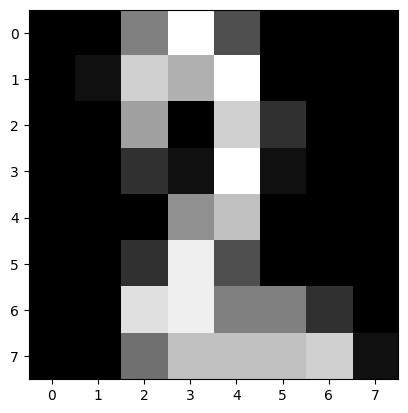

In [27]:
import matplotlib.pyplot as plt
x =digits.images[22]
plt.gray() # show pic in gray mode
plt.imshow(x) # show pic cmd
plt.show()

### Preproccessing

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.3)

In [29]:
x_train[0]

array([ 0.,  0., 12., 16., 16.,  8.,  0.,  0.,  0.,  3., 16., 13.,  8.,
        5.,  0.,  0.,  0.,  2., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,
       16., 13.,  9.,  0.,  0.,  0.,  0.,  0., 10., 16., 16.,  7.,  0.,
        0.,  0.,  0.,  0.,  1., 10., 13.,  0.,  0.,  0.,  0.,  2., 11.,
       16., 10.,  0.,  0.,  0.,  0., 11., 16., 12.,  0.,  0.,  0.])

#### Normalize

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler((0,1))
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [31]:
x_train[0]

array([0.    , 0.    , 0.75  , 1.    , 1.    , 0.5   , 0.    , 0.    ,
       0.    , 0.1875, 1.    , 0.8125, 0.5   , 0.3125, 0.    , 0.    ,
       0.    , 0.125 , 1.    , 0.1875, 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 1.    , 0.8125, 0.5625, 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.625 , 1.    , 1.    , 0.4375, 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.0625, 0.625 , 0.8125, 0.    , 0.    ,
       0.    , 0.    , 0.125 , 0.6875, 1.    , 0.625 , 0.    , 0.    ,
       0.    , 0.    , 0.6875, 1.    , 0.75  , 0.    , 0.    , 0.    ])

## PCA

In [32]:
x_train.shape,x_test.shape

((1257, 64), (540, 64))

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=32) # from 64 to 32  (digit.image.shape =64) look up
x_train= pca.fit_transform(x_train)
x_test= pca.transform(x_test)

In [34]:
x_train.shape,x_test.shape # now we have 32 from 64

((1257, 32), (540, 32))

# Performance Metric

In [35]:
from sklearn.metrics import accuracy_score,recall_score,precision_score
def calculate_metrics(y_train,y_test,y_pred_train,y_pred_test):
    accTrain=accuracy_score(y_true=y_train,y_pred=y_pred_train)
    accTest=accuracy_score(y_true=y_test,y_pred=y_pred_test)
    precision =precision_score(y_true=y_test,y_pred=y_pred_test ,average='weighted')
    recall =recall_score(y_true=y_test,y_pred=y_pred_test ,average='weighted')
    print(f"accuracy Train:{accTrain}\n accuracy Test:{accTest}\n Precision Score:{precision} \n Recall Score:{recall}")
    
    return accTrain , accTest ,precision ,recall

## Classification

### 1.Random Forest

In [36]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=128, n_estimators=256)

In [37]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

accTrain_rf , accTest_rf ,precision_rf ,recall_rf =calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

accuracy Train:1.0
 accuracy Test:0.9648148148148148
 Precision Score:0.9655620941529239 
 Recall Score:0.9648148148148148


### 3.SVM

In [38]:
from sklearn.svm import SVC
svm=SVC()

In [39]:
svm.fit(x_train,y_train)

SVC()

In [40]:
y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)

accTrain_svm , accTest_svm ,precision_svm ,recall_svm =calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

accuracy Train:0.9992044550517104
 accuracy Test:0.987037037037037
 Precision Score:0.9869588099398462 
 Recall Score:0.987037037037037


### 3.ANN

In [41]:
from sklearn.neural_network import MLPClassifier
ann=MLPClassifier(hidden_layer_sizes=256)
ann.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=256)

In [42]:
y_pred_train = ann.predict(x_train)
y_pred_test = ann.predict(x_test)

accTrain_ann , accTest_ann ,precision_ann ,recall_ann =calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

accuracy Train:1.0
 accuracy Test:0.9796296296296296
 Precision Score:0.9800682371714118 
 Recall Score:0.9796296296296296


### 4.KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [44]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

accTrain_knn , accTest_knn ,precision_knn ,recall_knn =calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

accuracy Train:0.9896579156722355
 accuracy Test:0.9796296296296296
 Precision Score:0.9799891097186124 
 Recall Score:0.9796296296296296


## Comparison 

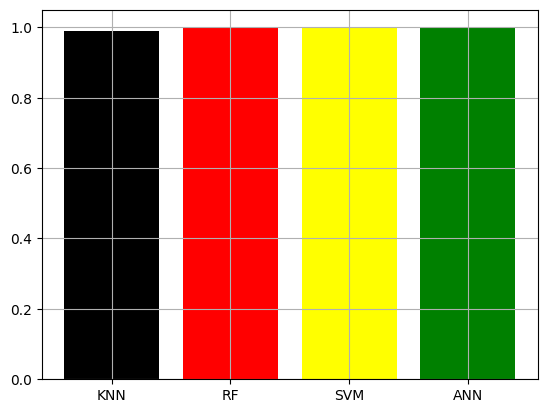

In [45]:
import matplotlib.pyplot as plt
accuracy_train =[accTrain_knn,accTrain_rf,accTrain_svm,accTrain_ann]
title = ["KNN","RF","SVM","ANN"] 
color=['black','red','yellow','green']
plt.bar(title,accuracy_train,color=color)
plt.grid()
plt.show()

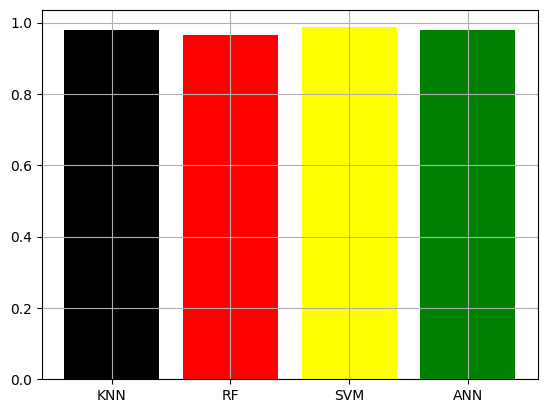

In [46]:
accuracy_test =[accTest_knn,accTest_rf,accTest_svm,accTest_ann]
title = ["KNN","RF","SVM","ANN"] 
color=['black','red','yellow','green']
plt.bar(title,accuracy_test,color=color)
plt.grid()
plt.show()

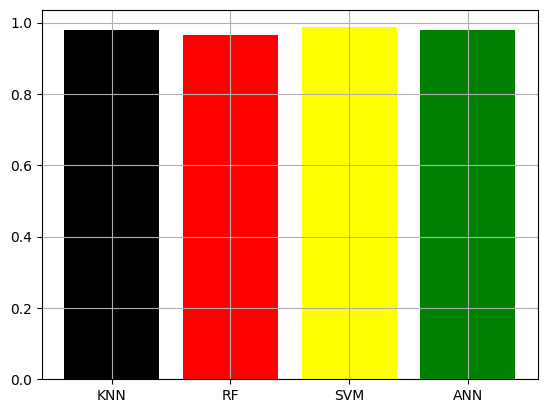

In [47]:
precision_test =[precision_knn,precision_rf,precision_svm,precision_ann]
title = ["KNN","RF","SVM","ANN"] 
color=['black','red','yellow','green']
plt.bar(title,precision_test,color=color)
plt.grid()

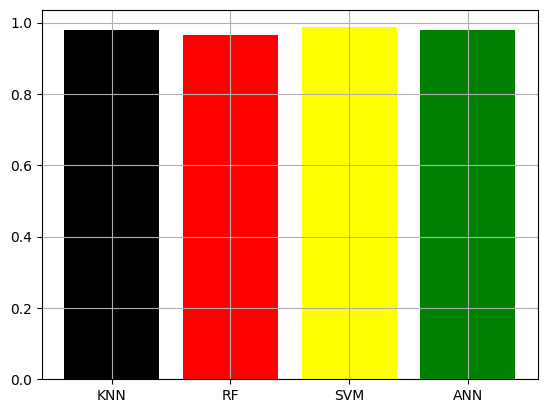

In [48]:
recall_test =[recall_knn,recall_rf,recall_svm,recall_ann]
title = ["KNN","RF","SVM","ANN"] 
color=['black','red','yellow','green']
plt.bar(title,recall_test,color=color)
plt.grid()
plt.show()